# Credit Card Fraud Detection

---
author: Alex Kim
date: November 6, 2024
embed-resources: true
---

## Introduction

Everyday, millions if not billions of credit card transactions are processed across the world. Banks across the world have a crucial responsibilty of confirming the legitimacy of every transaction in order to prevent fraud. The danger of fraudulent transactions are constantly present as bad actors often try to take advantage of weaknesses in order to gain money. In today's digitized world, making sure that every transaction is authentic and legitimate is extremely important for maintaining consumer trust and financial security. As a data scientist at a banking institution issuing credit cards, my task is to develop an automated fraud detector model. This model will analyze transcation data and identify the credit transaction as fraudulent or genuine. An important thing to note that is that the model should appropriately balance false positives and false negatives.

## Methods

In [218]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# model tuning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Model metric
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    make_scorer,
    precision_score,
    recall_score,
    fbeta_score,
)

To successfully develop an automated fraud detection/classification model, histroical data of credit card transactions, including whether or not they were fraudulent, will be primarily used. The data that will be used for developing the model are transactions made by credit cards in September 2013 by European cardholders made available on Kaggle. The data was collected and analyzed by Worldline and the Machine Learning Group of ULB (Université Libre de Bruxelles), specifically during their research collaboration on big data mining and fraud detection.

### Data Dictionary

#### Response
* **Fraud** [int64]: status of the transaction. 1 indicates a fraudulent transaction and 0 indicates not fraud, a genuine transaction.

#### Feature
* **Amount** [float64]: amount (in dollars) of the transaction.
* **PC01 - PC28** [float64]: the 28 principal components that encode information such as location and type of purchase while preserving customer privacy.

### Data

In [219]:
# load data
fraud = pd.read_parquet("https://cs307.org/lab-07/data/fraud.parquet")
fraud

,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,Amount,Fraud
0,-0.702080,-3.315274,0.612866,2.414363,-1.884599,1.514794,0.131483,0.225408,1.568789,-0.869887,...,0.496013,-0.096228,-0.924270,-0.175346,0.206700,-0.272192,-0.046401,0.192446,927.61,0
1,-0.690580,1.286872,1.629988,0.002150,0.061507,-0.546067,0.508168,-0.007774,0.773795,-0.212306,...,-0.355172,-0.665155,-0.021777,0.254960,-0.185833,0.019074,0.347278,0.163613,3.57,0
2,1.969394,-0.253345,-1.611232,0.627206,0.429682,0.178193,-0.174938,-0.095031,1.111306,-0.654715,...,0.140268,0.839200,-0.180253,0.090653,0.375609,0.856089,-0.023358,-0.030589,49.32,0
3,-0.553788,1.435771,-0.791836,-0.512074,0.937930,-0.567430,0.683134,0.310608,-0.070914,-1.480662,...,-0.000774,0.267238,-0.383380,-1.063272,-0.012404,0.644840,0.257065,0.191257,1.41,0
4,-1.503234,0.520610,0.591397,1.054720,1.306610,-1.392141,0.421473,-0.274220,-0.718293,-0.520577,...,-0.027699,0.122597,-0.096967,0.334576,-0.174797,0.446997,-0.311952,0.437133,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67840,-0.815702,1.250443,1.235399,0.798663,-0.104867,-0.198403,0.468914,0.187117,-0.404717,-0.090196,...,0.099021,0.270789,-0.066755,0.052279,-0.366833,-0.435550,-0.376964,-0.147660,19.99,0
67841,-3.517229,3.326821,-3.590262,0.674769,-0.679266,-0.469516,-1.135362,2.778095,-2.404956,0.378914,...,0.455767,0.388102,0.268986,0.382692,-0.653335,2.192962,-0.953907,-0.137082,0.76,0
67842,2.138450,-0.001148,-1.778731,0.076097,0.618824,-0.512793,0.206600,-0.280997,0.585802,-0.000395,...,0.193403,0.708043,-0.060317,0.076972,0.398423,-0.099414,-0.023301,-0.058588,1.00,0
67843,-2.639999,3.023083,-1.028799,3.095028,1.612154,1.002180,0.584766,0.545651,-1.380780,0.679444,...,-0.123887,-0.576202,0.136905,-1.426640,-0.822473,-0.427101,-2.163853,-0.553031,4.01,0


In [220]:
fraud_train, fraud_test = train_test_split(
    fraud,
    test_size=0.20,
    random_state=42,
    stratify=fraud["Fraud"],
)
fraud_train

,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,Amount,Fraud
57638,-0.514509,0.899378,1.627215,-0.142250,0.005250,-0.235422,0.482540,0.247403,-0.562327,-0.166813,...,-0.143290,-0.390205,0.030719,0.184779,-0.348711,0.073253,0.273217,0.107938,3.59,0
27686,-0.813568,-0.373893,1.152977,-0.449774,-3.868866,2.780636,3.654192,-0.672442,0.753230,-0.662803,...,-0.376783,-0.004239,0.074801,0.124238,-0.448493,0.861423,-0.093639,-0.711632,798.01,0
13321,-2.443142,3.258831,-0.791511,0.223548,0.007932,-1.263044,1.220214,-0.418068,1.860453,4.184883,...,-0.348587,0.531679,0.058990,0.371638,-0.207398,-0.505837,0.524542,-0.343895,1.79,0
28308,-0.397300,0.922104,1.224699,-0.334974,0.322603,-0.117372,0.534683,0.175550,-0.486404,-0.120147,...,-0.239303,-0.695001,-0.128231,-0.536463,-0.138971,0.107526,0.255644,0.100814,2.69,0
54252,1.994046,-0.367813,-0.462867,0.338661,-0.485326,-0.241576,-0.590987,0.089319,1.413224,-0.149292,...,-0.196388,-0.484457,0.421867,0.601393,-0.448014,-0.646256,0.027632,-0.027244,4.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49499,-0.033583,-0.487672,1.435406,-2.759369,-1.785638,0.402364,-2.306038,-2.287179,0.129717,-1.036412,...,-1.286823,0.824100,0.018890,0.000018,0.301618,0.081215,0.163422,0.252456,10.00,0
29250,-0.731245,1.151677,0.912393,-0.653540,0.700577,-0.461372,1.093273,-0.126254,-0.339171,-0.467356,...,-0.368185,-0.991854,-0.376461,-0.661608,0.554237,0.450650,0.076395,0.096252,6.99,0
31586,2.135923,-0.714182,-1.842502,-0.587267,0.090754,-0.465733,-0.024834,-0.328747,-0.659832,0.853241,...,-0.537267,-1.081138,0.196589,0.087797,-0.111583,0.479888,-0.082523,-0.053305,64.90,0
14898,-0.335632,0.939736,-2.961515,-1.224739,4.446891,2.352092,0.789725,0.609460,-0.746845,-1.580751,...,-0.002116,0.009686,-0.428325,0.536043,0.278736,0.680976,-0.069295,0.051891,0.76,0


In [221]:
num_samples = fraud_train.shape[0]
print(num_samples)

54276


The fraud train dataset contains 54276 rows and 30 columns. This tells us that there are 67845 samples and 29 features.

In [222]:
# summary statistics
## Counts
label_counts = fraud_train['Fraud'].value_counts()
print(label_counts)

Fraud
0    53961
1      315
Name: count, dtype: int64


In [223]:
## Proportions
proportion_fraud = fraud_train['Fraud'].value_counts(normalize=True).rename("proportion")
print(proportion_fraud)

Fraud
0    0.994196
1    0.005804
Name: proportion, dtype: float64


In [224]:
## Amount - Mean, Standard Deviation, Median, and Maximum
statistics = fraud_train.groupby('Fraud')['Amount'].agg(['mean', 'std', 'median', 'max']).reset_index()
print(statistics)

   Fraud        mean         std  median       max
0      0   88.065104  241.451144   21.80  10199.44
1      1  110.947016  254.978960    6.99   2125.87


In [225]:
none_stats = fraud_train['Amount'].agg(['mean', 'std', 'median', 'max'])
none_stats

mean         88.197903
std         241.535617
median       21.690000
max       10199.440000
Name: Amount, dtype: float64

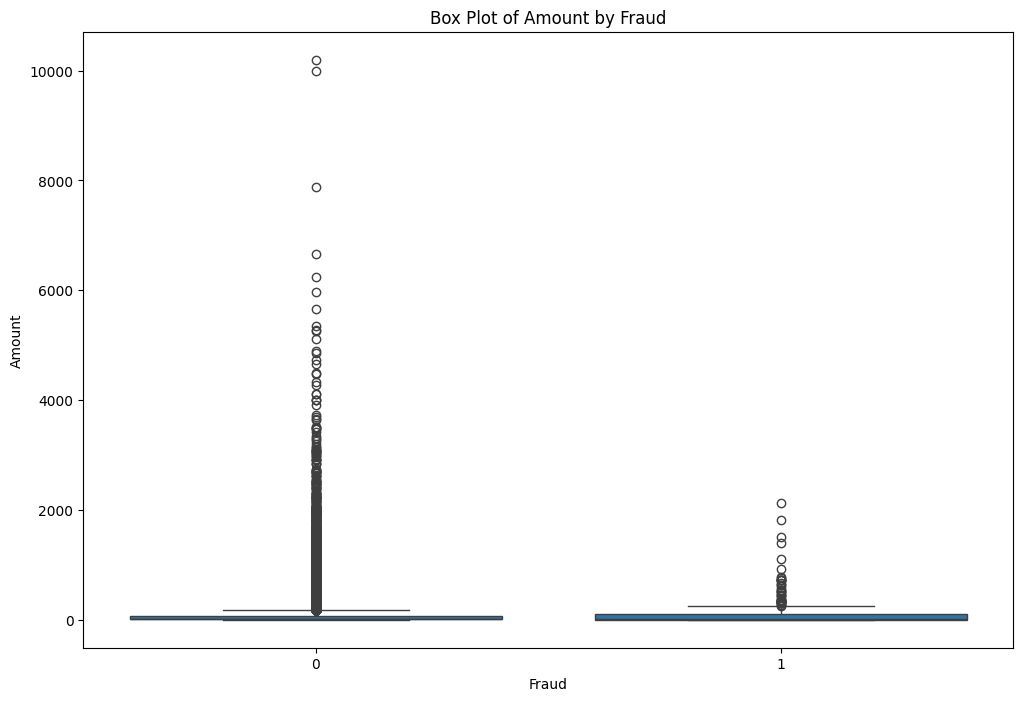

In [226]:
# visualizations - fraud vs amount 
plt.figure(figsize=(12, 8))
sns.boxplot(data=fraud_train, x='Fraud', y='Amount')
plt.title("Box Plot of Amount by Fraud")
plt.show()

The boxplot above shows the distribution and spread of the Amount variable for both Fraud and Not Fraud cases. It is very clear that there are unsually high number of Amount that are considered 'Not Fraud' compared to that are considered 'Fraud'. From this, we could assume that "bad" actors usually do not go for unusually high or large amount of money, as it would be easily noticable and put them at risk. We can further assume that 'bad' actors may stay and target at a certain range of value in order to blend in with normal transactions as well. 

### Models

In [227]:
# process data for ML
# create X and y for train
X_train = fraud_train.drop("Fraud", axis=1)
y_train = fraud_train["Fraud"]

# create X and y for test
X_test = fraud_test.drop("Fraud", axis=1)
y_test = fraud_test["Fraud"]


In [ ]:
# train models
# note numeric features
numeric_features = X_train.iloc[:, 1:]

# define pipeline for numeric
numeric_preprocessor = Pipeline(
    steps=[
        ("MedianImputer", SimpleImputer(strategy="median")),
        ("Standardize", StandardScaler()),
    ]
)

# column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("NumericProcessing", numeric_preprocessor, numeric_features),
    ],
    remainder="drop",
)

rf = RandomForestClassifier(random_state=42)

# class weights
weights_list = [
    {0: 1, 1: 1},
    {0: 1, 1: 2},
    "balanced",
]

# scoring metric
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "recall": make_scorer(recall_score),
    "precision": make_scorer(precision_score, zero_division=0),
    "f1": make_scorer(fbeta_score, beta=1),

}

# define parameter grid
rf_param_grid = {
    "classifier__n_estimators": [125, 175],
    "classifier__max_depth": [5,10],
    "classifier__class_weight": weights_list,
}

# create pipeline

pipeline = Pipeline(
    steps=[
       ("Preprocessor", preprocessor),
       ("classifier", rf),
    ]
)


# create GridSearchCV object
rf_grid = GridSearchCV(
    pipeline,
    rf_param_grid,
    cv=5,
    scoring=scoring,
    refit='f1',
)


In [229]:
# Fit the grid search object on the training data
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Preprocessor',
                                        ColumnTransformer(transformers=[('NumericProcessing',
                                                                         Pipeline(steps=[('MedianImputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Standardize',
                                                                                          StandardScaler())]),
                                                                         Index(['PC01', 'PC02', 'PC03', 'PC04', 'PC05', 'PC06', 'PC07', 'PC08', 'PC09',
       'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18',
       'P...
                         'classifier__max_depth': [5, 10],
                         'classifier__n_estimators': [125, 175]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(fbeta_score, response_method='predict', beta=1),
                      'precision': make_scorer(precision_score, response_method='predict', zero_division=0),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [230]:
print(f"Best parameters found with cross-validation:")
print(rf_grid.best_params_)

Best parameters found with cross-validation:
{'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__n_estimators': 125}


In [231]:
rf_grid.predict_proba(X_test)[:10]

array([[0.99541204, 0.00458796],
       [0.98363721, 0.01636279],
       [0.99879558, 0.00120442],
       [0.99739495, 0.00260505],
       [0.99809134, 0.00190866],
       [0.99729367, 0.00270633],
       [0.99236881, 0.00763119],
       [0.99696925, 0.00303075],
       [0.99549629, 0.00450371],
       [0.99839562, 0.00160438]])

In [232]:
# make predictions on the test set using the best model
y_pred = rf_grid.predict(X_test)

## Results

In [233]:
# report model metrics
# calculate test metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

Test Accuracy: 0.9988945390227725
Test Precision: 0.9848484848484849
Test Recall: 0.8227848101265823


The fraud detection/classification model achieves a test precision of 0.9848 and test recall of 0.8227.

## Discussion

Which is more important, precision or recall? (The performance cutoffs above suggest an answer to this question, but you do not necessarily need to agree with it.)

Through the development process of the model that detects and classifies fraud transactions, I developed a model that achieves a test precision of 0.9848 and test accuracy of 0.8227. These results tells us that the model performs generally well.  A precision of 0.9848 indicates that the model perfroms very well when it comes to reducing false positives. It means that the model very reliable when it comes to predicting transactions as fraudulent. The high precision also suggests that the model is almost always correct when it identifies a transaction as fraud. Furthermore, a recall of 0.8227 indicates that the model can correctly identify about 82% of the fraudulent transactions. But, this also tells us that it incorrectly identifies about 18% of the fraudulent transactions, which can bring about detrimental impact when it comes to credit fraud.

Both precision and recall are important evaluation metrics used to assess the model's overall performance in detecting fraudulent transactions. After careful evaluation, the model brings about exceptionally high precision, but a adequte and fair recall. Although the model was generally successful in preventing false positives, we discovered that it is still unable to detect some fraudulent transactions, which was roughly about 18% of the fraudlent transactions. It could be said that recall is more important to consider in high-stake situations like fraud detection. This is because failing to detect or identify fraudulent transactions can be bring a lot of harm to many. For instance, missing transactions that are actually fraud can be extremely detrimental to the bank's reputation and users themselves as well. Therefore, in this context, even if some of the fraud transactions are missed or not detected, it means that the model is not good enough to be put into practice and protecting the users from fraud.

### Conclusion

Overall, the automated fraud detection model definitely is promising in that it brings about great results overall, achieving a test precision of 0.9848 and test recall of 0.8227. However, I would not use the model in practice without further improvements or refinements, as the test recall is not great enough. Although the model's moderate recall shows that it misses some fraudulent transactions, its high accuracy suggests that it is very good at correctly predicting fraud when it does so. In this specific scenario, we should put more emphasis on recall over precision because avoiding missed fraud transactions is more important for credit fraud detection. Therefore, finding the right balance between precision and recall would make a better model that would accurately and reliably detect credit frauds.